In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import scipy as sc
import os
import seaborn as sns
import statsmodels.api as sm
sns.set()
import warnings
import itertools

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
size = 18
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,7),
          'axes.labelsize': size * 0.8,
          'axes.titlesize': size * 0.95,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}

plt.rcParams.update(params)

# Problem 1 (Predicting next quarter's Revenue)

## Loading and Visualizing Datasets

In [4]:
os.chdir(os.getcwd() + "/Desktop/grn-exercise-v20200313a/data")

In [5]:
df_activity = pd.read_csv("activity.csv")
df_price = pd.read_csv("pricing.csv")
df_transaction = pd.read_csv("transaction.csv")
df_marketing = pd.read_csv("marketing.csv")

In [6]:
df_transaction

,DATE,USERID,PRICE,UNITS,TOTAL
0,20150403,1000,4.0,3,12.0
1,20150403,1005,4.0,1,4.0
2,20150403,1020,4.0,1,4.0
3,20150403,1033,4.0,1,4.0
4,20150403,1039,4.0,2,8.0
...,...,...,...,...,...
1190144,20160702,95412,4.0,1,4.0
1190145,20160702,95434,4.0,1,4.0
1190146,20160702,95444,4.0,1,4.0
1190147,20160702,95452,4.0,1,4.0


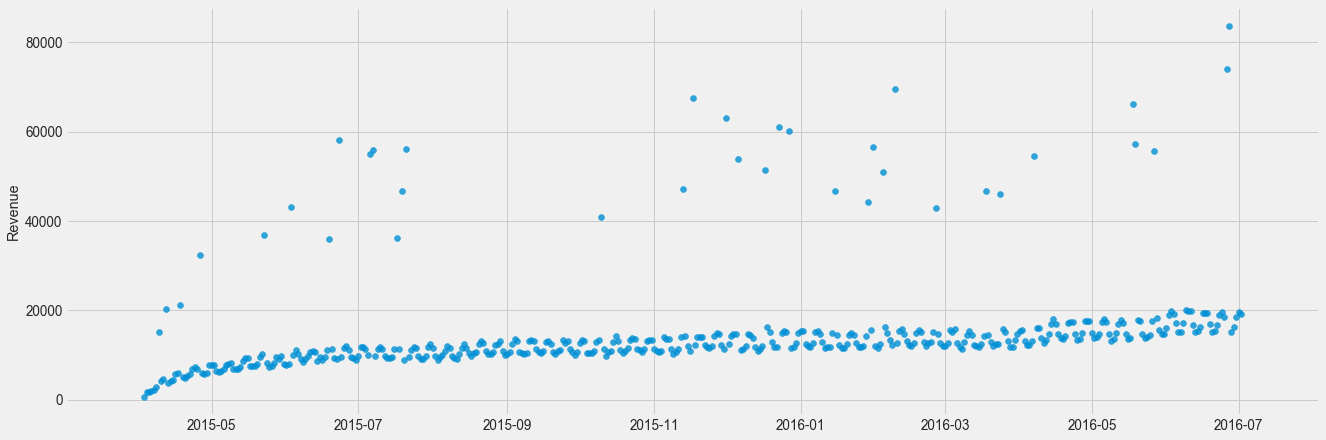

        DATE    TOTAL
6 2015-04-09  15208.0


In [7]:
df_transaction_modified = df_transaction.groupby("DATE" , as_index=False)["TOTAL"].sum()
df = df_transaction_modified.copy()
df['DATE'] = pd.to_datetime(df['DATE'].astype(str), format='%Y%m%d')
plt.scatter(df["DATE"], df["TOTAL"], alpha = 0.8)
plt.ylabel("Revenue")
plt.show()
print (df.loc[df["DATE"] == "2015-04-09"])


In [8]:
df1 = df.copy()
df1 = df1.set_index("DATE")
df_transaction['DATE'] = pd.to_datetime(df_transaction['DATE'].astype(str), format='%Y%m%d')

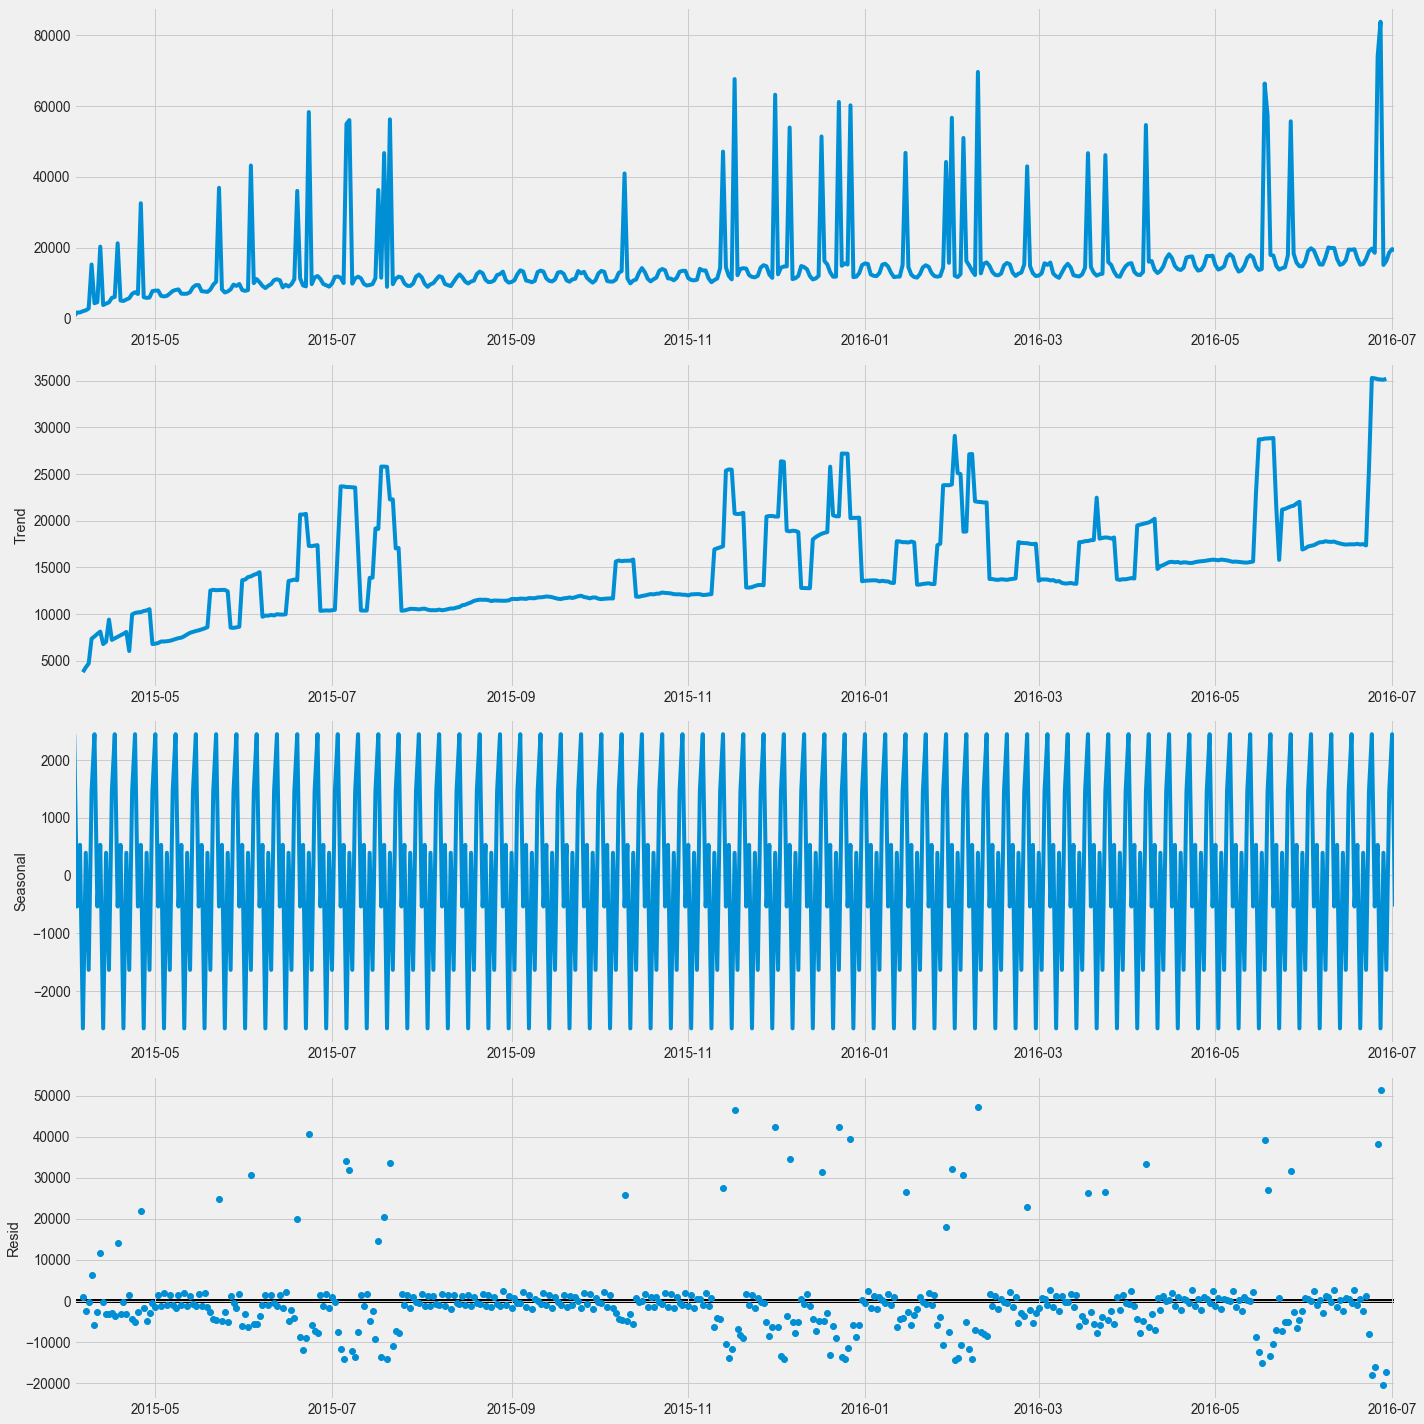

In [9]:
rcParams['figure.figsize'] = 20, 20
decomposition = sm.tsa.seasonal_decompose(df1, model='additive')
fig = decomposition.plot()
plt.show()

In [204]:
df_t = df.copy()

In [205]:
df_t = df_t.set_index("DATE")

In [223]:
df_weekly = df.copy()

In [1093]:
df_weekly = df.groupby([pd.Grouper(key='DATE', freq='W-SAT')])['TOTAL'].sum().reset_index()
df_weekly

,DATE,TOTAL
0,2015-04-04,2352.0
1,2015-04-11,32844.0
2,2015-04-18,65783.0
3,2015-04-25,42172.0
4,2015-05-02,73612.0
...,...,...
61,2016-06-04,119236.0
62,2016-06-11,124588.0
63,2016-06-18,122056.0
64,2016-06-25,121440.0


## Time series forecasting with ARIMA

In [13]:
x = df_transaction.groupby("DATE" , as_index=False).agg(
    {
        'UNITS': "sum",
        'TOTAL': "sum"
    }
)
x['DATE'] = pd.to_datetime(x['DATE'].astype(str), format='%Y%m%d')
x['PRICE'] = x['TOTAL']/x['UNITS']

In [14]:
x = x.set_index("DATE")
x_price = x['PRICE'].copy()
x_units = x['UNITS'].copy()

In [15]:
y = df.copy()
y = y.set_index("DATE")

In [35]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 16) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 16)
SARIMAX: (0, 0, 1) x (0, 1, 0, 16)
SARIMAX: (0, 1, 0) x (0, 1, 1, 16)
SARIMAX: (0, 1, 0) x (1, 0, 0, 16)


In [41]:
print ("Grid Search for Total Daily")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=True)
            results = mod.fit()
            print('ARIMA{}x{}14 - AIC:{}'.format(param, param_seasonal, results.aic))
        
        except:
            continue
                       

Grid Search for Total Daily
ARIMA(0, 0, 0)x(0, 0, 0, 16)14 - AIC:10277.214554698136
ARIMA(0, 0, 0)x(0, 0, 1, 16)14 - AIC:9810.299745499477
ARIMA(0, 0, 0)x(0, 1, 0, 16)14 - AIC:9704.416252332305
ARIMA(0, 0, 0)x(0, 1, 1, 16)14 - AIC:9186.813140853072
ARIMA(0, 0, 0)x(1, 0, 0, 16)14 - AIC:9672.472620222898
ARIMA(0, 0, 0)x(1, 0, 1, 16)14 - AIC:9517.408368395612
ARIMA(0, 0, 0)x(1, 1, 0, 16)14 - AIC:9293.824995648543
ARIMA(0, 0, 0)x(1, 1, 1, 16)14 - AIC:9188.66929893072
ARIMA(0, 0, 1)x(0, 0, 0, 16)14 - AIC:10115.124864459955
ARIMA(0, 0, 1)x(0, 0, 1, 16)14 - AIC:9714.998358373145
ARIMA(0, 0, 1)x(0, 1, 0, 16)14 - AIC:9683.16095957948
ARIMA(0, 0, 1)x(0, 1, 1, 16)14 - AIC:9187.735800144826
ARIMA(0, 0, 1)x(1, 0, 0, 16)14 - AIC:9720.111553423601
ARIMA(0, 0, 1)x(1, 0, 1, 16)14 - AIC:9617.71132083293
ARIMA(0, 0, 1)x(1, 1, 0, 16)14 - AIC:9300.824682320008
ARIMA(0, 0, 1)x(1, 1, 1, 16)14 - AIC:9189.725648123902
ARIMA(0, 1, 0)x(0, 0, 0, 16)14 - AIC:10017.534695187534
ARIMA(0, 1, 0)x(0, 0, 1, 16)14 - AIC:

In [93]:
from pmdarima import auto_arima 
auto_arima(y, seasonal=True, m=16,max_p=3, max_d=3,max_q=4, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  457
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -4881.610
Date:                Thu, 19 Mar 2020   AIC                           9777.219
Time:                        21:52:47   BIC                           9806.077
Sample:                             0   HQIC                          9788.587
                                - 457                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    249.8212    128.096      1.950      0.051      -1.243     500.885
ar.L1         -1.5333      0.058    -26.292      0.000      -1.648      -1.419
ar.L2         -0.8460      0.068    -12.502      0.000      -0.979      -0.713
ma.L1          0.6473      0.055     11.866      0.000       0.540       0.754
ma.L2         -0.5841      0.044    -13.293      0.000      -0.670      -0.498
ma.L3         -0.9008      0.047    -19.149      0.000      -0.993      -0.809
sigma2      1.279e+08      0.003   4.52e+10      0.000    1.28e+08    1.28e+08
===================================================================================
Ljung-Box (Q):                       30.50   Jarque-Bera (JB):              2703.71
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.52   Skew:                             3.15
Prob(H) (two-sided):                  0.01   Kurtosis:                        13.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.25e+24. Standard errors may be unstable.
"""

In [158]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(2, 1, 3),
                                seasonal_order=(4, 1, 6, 16),
                                enforce_stationarity=False,
                                enforce_invertibility=True)
results = mod.fit()
print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3474      0.303     -4.453      0.000      -1.940      -0.754
ar.L2         -0.6858      0.280     -2.447      0.014      -1.235      -0.137
ma.L1          0.5239      0.283      1.851      0.064      -0.031       1.079
ma.L2         -0.5556      0.183     -3.044      0.002      -0.913      -0.198
ma.L3         -0.7972      0.219     -3.635      0.000      -1.227      -0.367
ar.S.L16      -1.6533      0.756     -2.188      0.029      -3.134      -0.172
ar.S.L32      -1.6876      0.995     -1.696      0.090      -3.638       0.263
ar.S.L48      -1.6357      1.013     -1.614      0.106      -3.622       0.350
ar.S.L64      -0.7518      0.753     -0.999      0.318      -2.227       0.723
ma.S.L16       0.7006      0.863      0.812      0.417      -0.990       2.392
ma.S.L32      -0.0551      0.674     -0.082      0.9

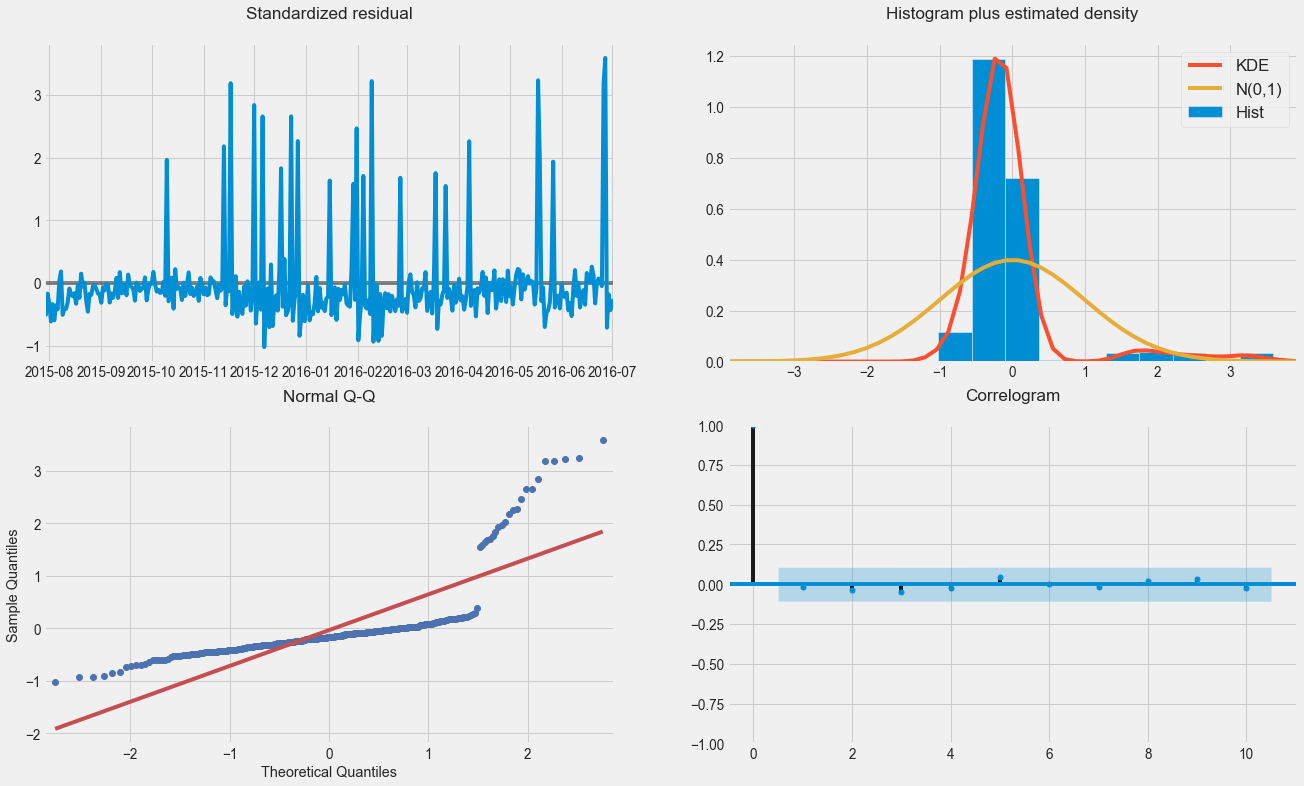

In [159]:
results.plot_diagnostics(figsize=(20, 12))
plt.show()

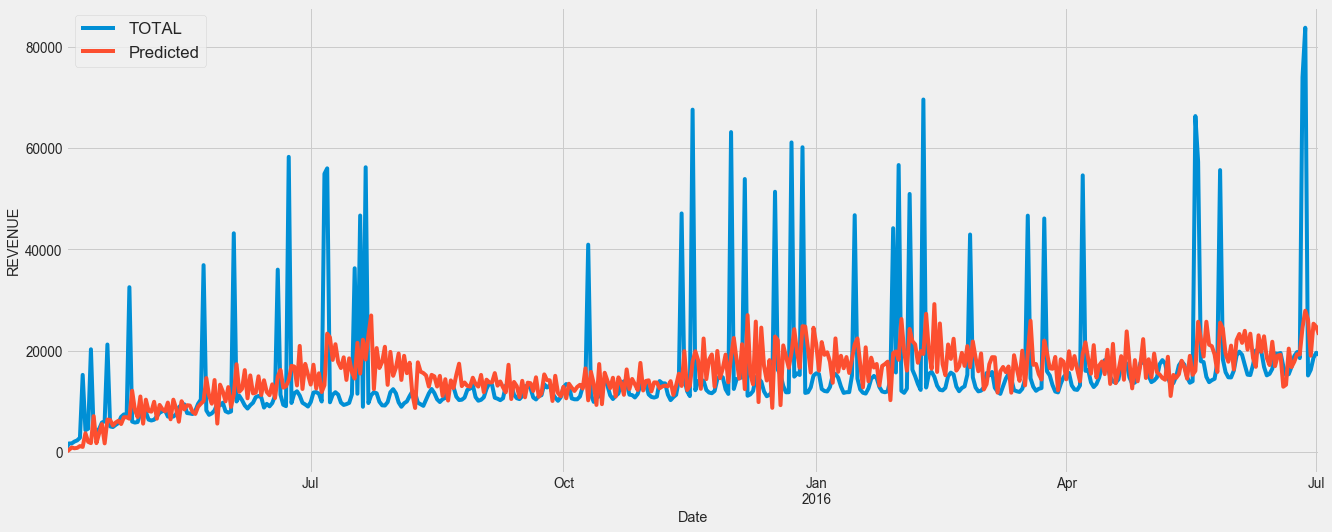

In [160]:
pred = results.get_prediction(start=pd.to_datetime('2015-04-03'), dynamic=False).predicted_mean
y.plot(label='Actual')
pred.plot(label='Predicted')
plt.xlabel('Date')
plt.ylabel('REVENUE')
plt.legend()
plt.show()


In [161]:
df_temp = (pred.to_frame().reset_index())
df_pred = pd.DataFrame()
df_pred["DATE"] = df_temp["index"]
df_pred["PREDICTED"] = df_temp[0]

In [201]:
df_pred

,DATE,PREDICTED
0,2015-04-03,0.000000
1,2015-04-04,381.196367
2,2015-04-05,868.987303
3,2015-04-06,717.639026
4,2015-04-07,794.031627
...,...,...
452,2016-06-28,26146.961727
453,2016-06-29,19003.010337
454,2016-06-30,25316.751658
455,2016-07-01,24717.488545


In [242]:
df_pred_weekly = df_pred.copy()

In [243]:
df_pred_weekly = df_pred_weekly.groupby([pd.Grouper(key='DATE', freq='W-SAT')])['PREDICTED'].sum().reset_index().sort_values('DATE')

In [244]:
df_pred_weekly = df_pred_weekly.set_index("DATE")

In [245]:
df_pred_weekly

,PREDICTED
DATE,
2015-04-04,381.196367
2015-04-11,10180.632597
2015-04-18,27762.943691
2015-04-25,42642.379315
2015-05-02,60653.789938
...,...
2016-06-04,141366.694362
2016-06-11,145560.890479
2016-06-18,135413.605950


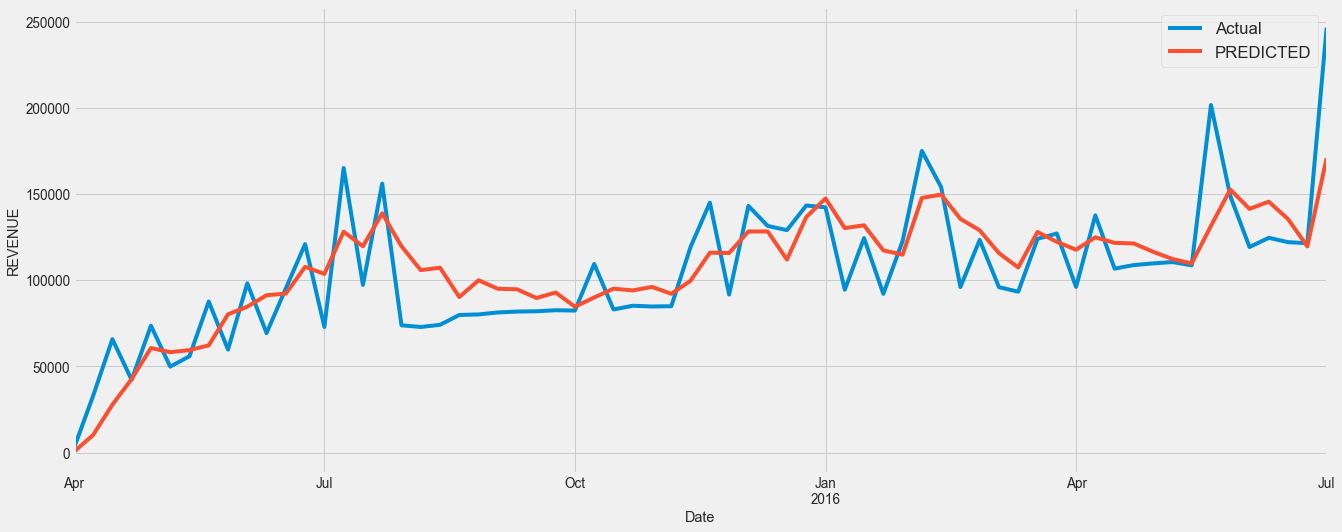

In [246]:
ax = df_weekly.plot(label='Actual')
df_pred_weekly.plot(ax = ax , label='Predicted')
plt.xlabel('Date')
plt.ylabel('REVENUE')
plt.legend()
plt.show()

In [254]:
rmse = np.sqrt(((df_weekly['TOTAL'] - df_pred_weekly['PREDICTED'].values)**2).mean())
rmse

22558.079899743072

In [297]:
pred_forecast = results.get_forecast(steps=91).predicted_mean
pred_forecast

2016-07-03    28099.340975
2016-07-04    21619.673762
2016-07-05    24856.122901
2016-07-06    28869.988321
2016-07-07    22886.780053
                  ...     
2016-09-27    28517.920968
2016-09-28    28498.035725
2016-09-29    29316.052199
2016-09-30    21206.736076
2016-10-01    24075.648624
Freq: D, Length: 91, dtype: float64

In [298]:
df_temp = (pred_forecast.to_frame().reset_index())
df_forecast = pd.DataFrame()
df_forecast["DATE"] = df_temp["index"]
df_forecast["FORECAST"] = df_temp[0]

In [299]:
df_forecast_weekly = df_forecast.copy()

In [300]:
df_forecast_weekly = df_forecast_weekly.groupby([pd.Grouper(key='DATE', freq='W-SAT')])['FORECAST'].sum().reset_index().sort_values('DATE')

In [438]:
df_forecast_weekly

,FORECAST
DATE,
2016-07-09,173204.543763
2016-07-16,171463.622115
2016-07-23,171903.687802
2016-07-30,166983.784379
2016-08-06,172227.140998
2016-08-13,189268.970533
2016-08-20,184809.726363
2016-08-27,175907.488187
2016-09-03,186201.871654


In [318]:
df_forecast_weekly = df_forecast_weekly.set_index("DATE")

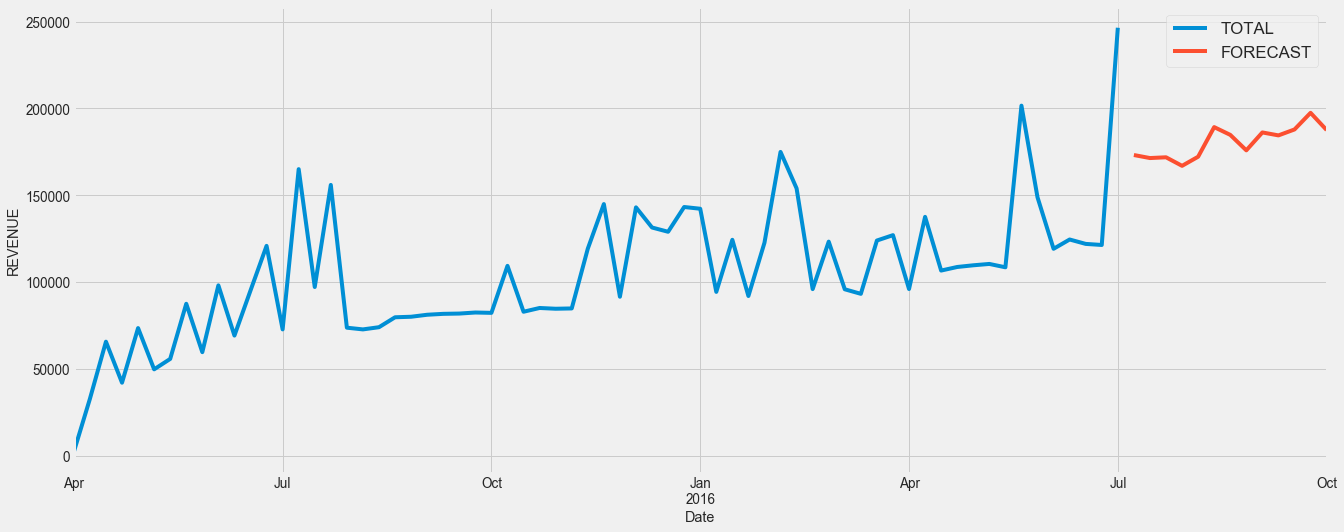

In [319]:
ax = df_weekly.plot()
df_forecast_weekly.plot(ax = ax)
plt.xlabel('Date')
plt.ylabel('REVENUE')
plt.legend()
plt.show()

In [356]:
df_input = pd.read_csv("problem-one-forecast-weeks.csv", header = None)
df_input[2] = df_forecast_weekly["FORECAST"].values
df_input.to_csv("problem-one-answer.csv", header = False, index = False)


# Problem 2 (Predicting which new users will be high-value)

In [382]:
df_users_in = pd.read_csv("problem-two-new-users.csv", header=None)
df_users_in[0]

0       91711
1       91712
2       91713
3       91714
4       91715
        ...  
1944    94167
1945    94179
1946    94213
1947    94273
1948    94314
Name: 0, Length: 1949, dtype: int64

In [641]:
user_list = df_transaction["USERID"].unique()

In [597]:
df_1 = df_transaction.groupby( ['USERID', 'DATE'] ).agg(
    {
        'TOTAL':sum,
    }
)
df_1 = df_1.reset_index()

In [663]:
df_users_in = pd.read_csv("problem-two-new-users.csv", header = None)
users_pred = (df_users_in[0].values.tolist())

In [926]:
x_train = []
y_train = []
x_test = []

for user in user_list:
    
    if user not in users_pred:
        x = df_1.loc[df_1["USERID"] == user].set_index("DATE").resample("1M")["TOTAL"].sum()[0: 2].sum()
        y = df_1.loc[df_1["USERID"] == user].set_index("DATE").resample("1M")["TOTAL"].sum()[2: 6].sum()

        #print(user, x, y)
        x_train.append(x)
        y_train.append(y)
        

In [927]:
x_test = []
c = 0
for user in users_pred:
    x = df_1.loc[df_1["USERID"] == user].set_index("DATE").resample("1M")["TOTAL"].sum()[0: 2].sum()
    c += 1
    x_test.append(x)


In [928]:
len(x_train)

89426

In [931]:
x_train_backup = x_train
y_train_backup = y_train

In [1102]:
y_train = y_train_backup
x_train = x_train_backup

In [1103]:
len(x_train)

89426

In [1104]:
train_samples = int(len(x_train) * 1)

x_train = x_train[:train_samples - 1]
x_val = x_train[train_samples - 1:]
y_train = y_train[:train_samples - 1]
y_val = y_train[train_samples - 1:]

len(x_train)

89425

In [1111]:
x_val = x_train_backup[train_samples - 1:]
y_val = y_train_backup[train_samples - 1:]

In [1112]:
x_train = np.asarray(x_train, dtype=np.float64).reshape((-1,1))
y_train = np.asarray(y_train, dtype=np.float64).reshape((-1,1))
x_val = np.asarray(x_val, dtype=np.float64).reshape((-1,1))
y_val = np.asarray(y_val, dtype=np.float64).reshape((-1,1))

In [1113]:
x_train.shape

(89425, 1)

## XGBoost Regression

In [1124]:
import xgboost as xgb

class Model:
    def __init__(self, x_train, y_train, x_val, y_val):
        
        self.x_train = x_train
        self.y_train = y_train
        self.x_val = x_val
        self.y_val = y_val
    
    def trainModel(self, epoch = 10, verbose_flag = True, learning_rate = 0.01):
        
        regressor = xgb.XGBRegressor(colsample_bytree = 0.4, learning_rate = learning_rate, base_score=0.65, max_depth = 3, alpha = 5, n_estimators = epoch)
        xgbModel=regressor.fit(x_train, y_train,eval_set = [(x_train, y_train), (x_val, y_val)], verbose = verbose_flag)
        return (xgbModel, regressor)


In [1161]:
m1 = Model(x_train, y_train ,x_val, y_val)
xgbModel1, regressor1 = m1.trainModel(epoch = 250)

[0]	validation_0-rmse:62.033	validation_1-rmse:0.727778
[1]	validation_0-rmse:61.6819	validation_1-rmse:0.804778
[2]	validation_0-rmse:61.3359	validation_1-rmse:0.881008
[3]	validation_0-rmse:60.9948	validation_1-rmse:0.956476
[4]	validation_0-rmse:60.6586	validation_1-rmse:1.03119
[5]	validation_0-rmse:60.3277	validation_1-rmse:1.10516
[6]	validation_0-rmse:60.0012	validation_1-rmse:1.17838
[7]	validation_0-rmse:59.6794	validation_1-rmse:1.25088
[8]	validation_0-rmse:59.3627	validation_1-rmse:1.32265
[9]	validation_0-rmse:59.0503	validation_1-rmse:1.3937
[10]	validation_0-rmse:58.7425	validation_1-rmse:1.46404
[11]	validation_0-rmse:58.4395	validation_1-rmse:1.53368
[12]	validation_0-rmse:58.1407	validation_1-rmse:1.60262
[13]	validation_0-rmse:57.8466	validation_1-rmse:1.67087
[14]	validation_0-rmse:57.5566	validation_1-rmse:1.73844
[15]	validation_0-rmse:57.271	validation_1-rmse:1.80534
[16]	validation_0-rmse:56.9894	validation_1-rmse:1.87156
[17]	validation_0-rmse:56.7123	validatio

In [1162]:
y_val = y_val.reshape(-1)

In [1163]:
y_val_bin = (y_val >= 100).astype(int)
np.count_nonzero(y_val_bin)

0

In [1164]:
y_pred_val = (regressor1.predict(x_val) >= 100).astype(int)
misclassify = np.count_nonzero(np.abs(y_pred_val - y_val_bin))
misclassify

0

In [1165]:
classification_accuracy = 100 * (len(y_val_bin) - misclassify)/len(y_val_bin)
print ("In-sample classification accuracy: " + str(classification_accuracy) + "%")

In-sample classification accuracy: 100.0%


In [1166]:
x_test = np.asarray(x_test, dtype=np.float64).reshape((-1,1))
pred = regressor1.predict(x_test)
y_pred = (pred >= 100).astype(int)
np.count_nonzero(y_pred)

19

In [1167]:
for i in range(len(x_test)):
    if y_pred[i] == 1:
        print (x_test[i])

[86.]
[112.]
[96.]
[88.]
[86.]
[90.]
[92.]
[98.]
[134.]
[80.]
[114.]
[94.]
[98.]
[104.]
[84.]
[86.]
[110.]
[80.]
[136.]


In [1169]:
df_users_in[1] = y_pred
df_users_in.to_csv("problem-two-answers.csv", header = False, index = False)